<center>  Marine VAN RENTERGHEM (31621700)  </center>
<h1><center> LMAPR1492 Physique des matériaux : Tâche 5 </center></h1>
Notebook permettant de télécharger le fichier CIF correspondant au materiau mp-9035 et de déterminer son type de maille, son système cristallin, son groupe ponctuel ainsi que les vecteurs de bases de son réseau direct et réciproque.

## 1.Télécharger le fichier CIF du matériau mp-9035

In [1]:
#Code permettant de créer le fichier CIF computed de la structure du NaLuS2 (mp-9035) 
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("lTqZwmbprAgWB64c") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-9035")
    w = CifWriter(structure)
    w.write_file('NaLuS2_computed.cif')

In [2]:
#Code permettant de créer le fichier CIF symmetrized de la structure du NaLuS2 (mp-9035)
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("lTqZwmbprAgWB64c") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-9035")
    w = CifWriter(structure,symprec=0.1)
    w.write_file('NaLuS2_symmetrized.cif')

## 2. Caractérisation du réseau cristallin

In [3]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
structure=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
print("Système Cristallin : ",  SpacegroupAnalyzer(structure).get_crystal_system())
print("Type de maille : ",SpacegroupAnalyzer(structure).get_lattice_type())
print("Index du groupe d'espace : ",SpacegroupAnalyzer(structure).get_space_group_number())
print("Groupe spatial : ", SpacegroupAnalyzer(structure).get_space_group_symbol())
print("Groupe ponctuel : ",SpacegroupAnalyzer(structure).get_point_group_symbol())
print("Longueur caractéristique L [angstrom] : ", "a : ",structure.lattice.a)
print("a : ",structure.lattice.a, "b : ",structure.lattice.b,"c : ",structure.lattice.c)
print("Angle caractéristique [degrés] : ","alpha :",structure.lattice.alpha)
print("alpha :",structure.lattice.alpha,"beta :",structure.lattice.beta, "gamma :",structure.lattice.gamma)
print("-------------------------------------------------------------------------")

Système Cristallin :  trigonal
Type de maille :  rhombohedral
Index du groupe d'espace :  166
Groupe spatial :  R-3m
Groupe ponctuel :  -3m
Longueur caractéristique L [angstrom] :  a :  7.038457735067571
a :  7.038457735067571 b :  7.038457735067571 c :  7.038457735067571
Angle caractéristique [degrés] :  alpha : 32.18657423045389
alpha : 32.18657423045389 beta : 32.18657423045389 gamma : 32.186574230453886
-------------------------------------------------------------------------


Le matériau mp-9035 est une structure cristalline du $NaLuS_2$. Son groupe spatial  est $R\overline{3}m$ (d'index 166) et son groupe ponctuel est $\overline{3}m$. Le système cristallin de ce matériau est donc le système trigonal et son type de maille est rhomboédrique (R). 

La signification du groupe ponctuel $\overline{3}m$ est la suivante : 
<ul>
<li>$\overline{3}$ représente un axe de roto-inversion d'ordre 3 selon la direction [111]</li>
<li>m représente un plan miroir perpendiculaire aux directions $[1\overline{1}0]$,$[01\overline{1}]$ et $[\overline{1}01]$</li>

</ul>

Ci-dessous sont représentés les mailles conventionnelles et primitives du $NaLuS_2$. Les atomes jaunes clair sont les atomes de Soufre (S), les atomes jaunes plus foncés sont les atomes de Sodium (Na) et les atomes verts sont les atomes de Lutecium (Lu). 

Cellule conventionnelle : 
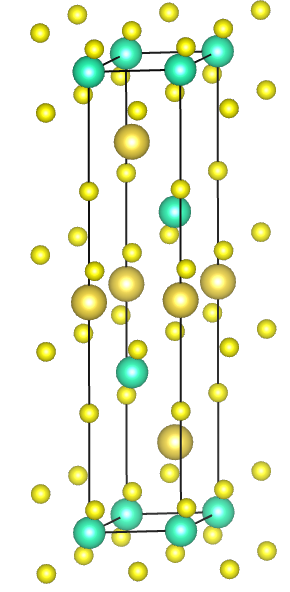
Cellule primitive :
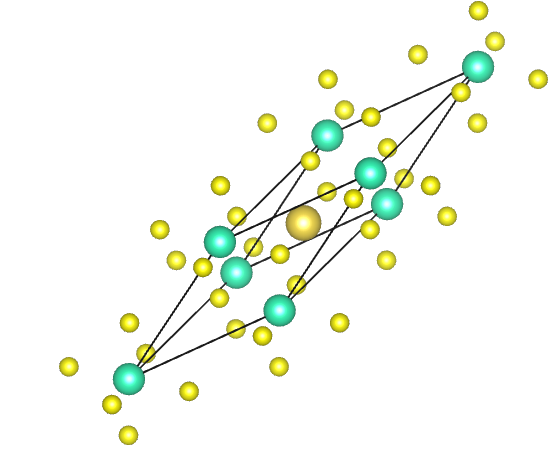

Considérons la cellule primitive pour l'étude de ce matériau. Le système trigonal est caractérisé par le fait que a=b=c et que $\alpha=\beta=\gamma$. A partir du fichier CIF, nous trouvons bien que $a=b=c=7.038458 \overset{\circ}{A} $ et que $\alpha=\beta=\gamma=32.186574 °$. 

## 3. Vecteurs de base du réseau direct

In [4]:
import numpy as np
base=structure.lattice.rhombohedral(structure.lattice.a,structure.lattice.alpha).matrix
print("Vecteurs de base du réseau direct")
print("a : ", base[0,:])
print("b : ", base[1,:])
print("c : ", base[2,:])
vol=np.dot(base[0,:],np.cross(base[1,:],base[2,:]))
print("Volume de la maille du réseau direct : ", vol)
print("---------------------------------------------------------------")

#print(structure.lattice.rhombohedral(structure.lattice.a,structure.lattice.alpha).matrix)


Vecteurs de base du réseau direct
a :  [3.74923144 0.         5.95677353]
b :  [1.71857831 3.3321502  5.95677353]
c :  [0.         0.         7.03845774]
Volume de la maille du réseau direct :  87.93146851063973
---------------------------------------------------------------


Comme le montre le package pymatgen, les vecteurs de base du réseau direct sont : 

$\vec{a}=(3.749,0,5.957)$

$\vec{b}=(1.719,3.332,5.957)$

$\vec{c}=(0,0,7.038)$

En posant $L=7.038458 \overset{\circ}{A}$, on obtient : 

$\vec{a}=L(0.533, 0, 0.846)$

$\vec{b}=L(0.244,0.473,0.846)$

$\vec{c}=L(0,0,1)$

La norme de chacun de ces vecteurs vaut bien $7.038 \overset{\circ}{A}$ tandis que l'angle entre ces vecteurs est bien de $32.187°$. 

Le volume de cette maille est : $\Omega=\vec{a}\cdot(\vec{b}\times \vec{c})=87,931\overset{\circ}{A}^3$






## 4. Vecteurs de base du réseau réciproque

In [5]:
baser=structure.lattice.rhombohedral(structure.lattice.a,structure.lattice.alpha).reciprocal_lattice.matrix
print("Vecteurs de base du réseau réciproque")
print(2*np.pi/vol*np.cross(base[1,:],base[2,:]))
print("a* : ", baser[0,:])
print("b* : ", baser[1,:])
print("c* : ", baser[2,:])
volrec=np.dot(baser[0,:],np.cross(baser[1,:],baser[2,:]))
print("Volume de la maille du réseau réciproque : ", volrec)
print("-----------------------------------------------------------------")
#print(structure.lattice.rhombohedral(structure.lattice.a,structure.lattice.alpha).reciprocal_lattice.matrix)

Vecteurs de base du réseau réciproque
[ 1.67585955 -0.86433555  0.        ]
a* :  [ 1.67585955 -0.86433555  0.        ]
b* :  [0.         1.88562488 0.        ]
c* :  [-1.41831012 -0.86433555  0.89269348]
Volume de la maille du réseau réciproque :  2.8209492874827222
-----------------------------------------------------------------



Comme le montre le package pymatgen, les vecteurs de base du réseau réciproque sont :

$\vec{a^*}=\frac{2\pi}{\Omega}(\vec{b}\times \vec{c})=(1.676, -0.864,  0)$

$\vec{b^*}=\frac{2\pi}{\Omega}(\vec{c}\times \vec{a})=(0,1.886, 0)$

$\vec{c^*}=\frac{2\pi}{\Omega}(\vec{a}\times \vec{b})=(-1.418,-0.864,0.893)$

Le volume de cette maille est  $\Omega^*=\vec{a^*}\cdot (\vec{b^*}\times\vec{c^*})=2,82 \overset{\circ}{A}^3$. 

Et on a bien l'équation $\Omega^*=\frac{(2\pi)^3}{\Omega}$ qui est vérifiée.




